# Walmart GeoLocations-Analysis

In [22]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

import gmaps
import warnings
warnings.filterwarnings('ignore')
# Google developer API key
from config_walmart import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [23]:
# Target city
target_city = "Boise, Idaho"

# Build the endpoint URL
target_url = "https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s"% (target_city, gkey)

In [24]:
results=requests.get(target_url).json()

In [25]:
results['results'][0]['geometry']['location']


{'lat': 43.6150186, 'lng': -116.2023137}

In [26]:
address='4301,Norwalk Drive'

In [27]:
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

37.3201459855563 -121.975051690677


In [28]:

url="http://api.walmartlabs.com/v1/stores?apiKey=rrvpb4x3az8mubaxka7uvhkj&city=SanJose&format=json"
res=requests.get(url).json()

df=json_normalize(res)
df.head()

,city,coordinates,country,name,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
0,San Jose,"[-121.860387, 37.331034]",US,San Jose Supercenter,5435,408-885-1142,CA,777 Story Rd,True,PST,95122
1,San Jose,"[-121.871095, 37.31621]",US,San Jose Neighborhood Market,4174,408-454-4508,CA,1450 Monterey Rd,True,PST,95112
2,San Jose,"[-121.973182, 37.321668]",US,San Jose Neighborhood Market,2486,408-556-4505,CA,4080 Stevens Creek Blvd,True,PST,95129
3,San Jose,"[-121.880176, 37.255456]",US,San Jose Supercenter,5884,408-600-3072,CA,5095 Almaden Expy,True,PST,95118
4,San Jose,"[-121.773066, 37.313558]",US,San Jose Neighborhood Market,3023,408-826-0338,CA,4055 Evergreen Village Sq Ste 140,True,PST,95135


In [30]:
l=df['coordinates']
z=[]
for i in l:
    for j in reversed(i):
        z.append(j)
N=2
subList = [z[n:n+N] for n in range(0, len(z), N)]
subList

[[37.331034, -121.860387],
 [37.31621, -121.871095],
 [37.321668, -121.973182],
 [37.255456, -121.880176],
 [37.313558, -121.773066],
 [37.291593, -121.9887],
 [37.3900085, -121.9855022],
 [37.431416, -121.921182],
 [37.511302, -121.943195],
 [37.400846, -122.109748],
 [37.520242, -121.985626],
 [37.149211, -121.655172],
 [37.604711, -122.067306],
 [37.689975, -121.876915],
 [37.698323, -121.887338],
 [37.699249, -121.767991],
 [37.729313, -121.929191],
 [37.688248, -122.131586],
 [37.008583, -121.551183],
 [37.714599, -122.177691],
 [37.751554, -121.471986],
 [37.462266, -121.142722],
 [37.96348, -121.761615],
 [36.717758, -121.650404],
 [36.693096, -121.801112],
 [36.705873, -121.668832],
 [38.009048, -121.868154],
 [37.996909, -122.109451],
 [37.785539, -121.218572]]

In [9]:

fig = gmaps.figure(map_type='SATELLITE')
# generate some (latitude, longitude) pairs
locations =subList
heatmap_layer = gmaps.heatmap_layer(locations)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [10]:
fig = gmaps.figure()
markers = gmaps.marker_layer(subList)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
l1=pd.DataFrame(df.groupby('city').count())
#l1.sort_values(by='0',ascending=False)
l1

,coordinates,country,name,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
city,,,,,,,,,,
Antioch,1,1,1,1,1,1,1,1,1,1
Fremont,2,2,2,2,2,2,2,2,2,2
Gilroy,1,1,1,1,1,1,1,1,1,1
Livermore,1,1,1,1,1,1,1,1,1,1
Manteca,1,1,1,1,1,1,1,1,1,1
Marina,1,1,1,1,1,1,1,1,1,1
Martinez,1,1,1,1,1,1,1,1,1,1
Milpitas,1,1,1,1,1,1,1,1,1,1
Morgan Hill,1,1,1,1,1,1,1,1,1,1


In [12]:
l1=l1.reset_index()
l2=l1.sort_values(by='sundayOpen',ascending=False)

In [13]:
l2

,city,coordinates,country,name,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
14,San Jose,6,6,6,6,6,6,6,6,6,6
1,Fremont,2,2,2,2,2,2,2,2,2,2
15,San Leandro,2,2,2,2,2,2,2,2,2,2
13,Salinas,2,2,2,2,2,2,2,2,2,2
12,Pleasanton,2,2,2,2,2,2,2,2,2,2
0,Antioch,1,1,1,1,1,1,1,1,1,1
18,Tracy,1,1,1,1,1,1,1,1,1,1
17,Santa Clara,1,1,1,1,1,1,1,1,1,1
16,San Ramon,1,1,1,1,1,1,1,1,1,1
11,Pittsburg,1,1,1,1,1,1,1,1,1,1


In [14]:
# @hidden_cell
url3="http://api.walmartlabs.com/v1/stores?apiKey=rrvpb4x3az8mubaxka7uvhkj&city=California&format=json"

In [15]:


res3=requests.get(url3).json()
df1=json_normalize(res3)
df2=df1['name']
t=len(df2)
sc=0
s=0
nm=0
city='San Jose'
for i in df2:
    if 'Supercenter' in i.split():
        sc=sc+1
    elif 'Store' in i.split():
        s=s+1
    else:
        nm=nm+1
print(f"Total number of Walmarts in {city}:{t}\nTotal number of Supercenters:{sc}\nTotal number of Stores:{s}\nTotal number of Neighborhood Markets:{nm}")

Total number of Walmarts in San Jose:530
Total number of Supercenters:138
Total number of Stores:72
Total number of Neighborhood Markets:320


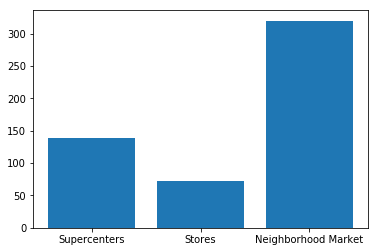

In [16]:
import matplotlib.pyplot as plt
x=["Supercenters","Stores","Neighborhood Market"]
y=[sc,s,nm]
plt.bar(x,y)
plt.show()

In [27]:
city1=input("Enter the name of the city : ")



Enter the name of the city : Los Angeles


In [28]:
print(city1)

Los Angeles


In [29]:
# @hidden_cell
url4=f"http://api.walmartlabs.com/v1/stores?apiKey=rrvpb4x3az8mubaxka7uvhkj&city={city1}&format=json"


In [32]:

print(city1)
res4=requests.get(url4).json()
dff=json_normalize(res4)

dff2=dff['name']
t=len(dff2)
sc=0
s=0
nm=0

for i in dff2:
    if 'Supercenter' in i.split():
        sc=sc+1
    elif 'Store' in i.split():
        s=s+1
    else:
        nm=nm+1
print(f"Total number of Walmarts in {city1}:{t}\nTotal number of Supercenters:{sc}\nTotal number of Stores:{s}\nTotal number of Neighborhood Markets:{nm}")

Los Angeles
Total number of Walmarts in Los Angeles:82
Total number of Supercenters:39
Total number of Stores:19
Total number of Neighborhood Markets:24


In [31]:
dff

,city,coordinates,country,name,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
0,South Gate,"[-118.187613, 33.954813]",US,South Gate Supercenter,3180,323-282-4800,CA,4651 Firestone Blvd,True,PST,90280
1,Rosemead,"[-118.085476, 34.050394]",US,Rosemead Supercenter,5154,626-307-1010,CA,1827 Walnut Grove Ave,True,PST,91770
2,Pico Rivera,"[-118.105078, 33.985005]",US,Pico Rivera Supercenter,2886,562-801-2413,CA,8500 Washington Blvd,True,PST,90660
3,Compton,"[-118.208176, 33.910022]",US,Compton Supercenter,5807,562-295-3870,CA,2100 N Long Beach Blvd,True,PST,90221
4,Downey,"[-118.147756, 33.928185]",US,Downey Neighborhood Market,5603,562-622-4891,CA,12270 Paramount Blvd,True,PST,90242
5,Burbank,"[-118.32521, 34.188222]",US,Burbank Supercenter,5686,747-261-7243,CA,1301 N Victory Pl,True,PST,91502
6,Downey,"[-118.129015, 33.924644]",US,Downey Supercenter,4132,562-803-3507,CA,9001 Apollo Way,True,PST,90242
7,Paramount,"[-118.14535, 33.902464]",US,Paramount Supercenter,2110,562-531-8240,CA,14501 Lakewood Blvd,True,PST,90723
8,Hawthorne,"[-118.362426, 33.900143]",US,Hawthorne Neighborhood Market,5604,424-336-2212,CA,14441 Inglewood Ave,True,PST,90250
9,Norwalk,"[-118.0828631, 33.9183185]",US,Norwalk Store,5164,562-929-6766,CA,11729 Imperial Hwy,True,PST,90650


In [34]:
url5="http://api.walmartlabs.com/v1/stores?apiKey=rrvpb4x3az8mubaxka7uvhkj&zip=95129&format=json"
res5=requests.get(url5).json()
df=json_normalize(res5)
df

,city,coordinates,country,name,no,phoneNumber,stateProvCode,streetAddress,sundayOpen,timezone,zip
0,San Jose,"[-121.9887, 37.291593]",US,San Jose Neighborhood Market,3025,408-796-3823,CA,1600 Saratoga Ave Unit 501,True,PST,95129
1,San Jose,"[-121.973182, 37.321668]",US,San Jose Neighborhood Market,2486,408-556-4505,CA,4080 Stevens Creek Blvd,True,PST,95129
2,Santa Clara,"[-121.9855022, 37.3900085]",US,Santa Clara Neighborhood Market,3123,408-961-3599,CA,3255 Mission College Blvd,True,PST,95054
3,San Jose,"[-121.871095, 37.31621]",US,San Jose Neighborhood Market,4174,408-454-4508,CA,1450 Monterey Rd,True,PST,95112
4,San Jose,"[-121.880176, 37.255456]",US,San Jose Supercenter,5884,408-600-3072,CA,5095 Almaden Expy,True,PST,95118
5,San Jose,"[-121.860387, 37.331034]",US,San Jose Supercenter,5435,408-885-1142,CA,777 Story Rd,True,PST,95122
6,Mountain View,"[-122.109748, 37.400846]",US,Mountain View Store,2280,650-917-0796,CA,600 Showers Dr,True,PST,94040
7,Milpitas,"[-121.921182, 37.431416]",US,Milpitas Supercenter,2119,408-934-0304,CA,301 Ranch Dr,True,PST,95035
8,San Jose,"[-121.773066, 37.313558]",US,San Jose Neighborhood Market,3023,408-826-0338,CA,4055 Evergreen Village Sq Ste 140,True,PST,95135
9,Fremont,"[-121.943195, 37.511302]",US,Fremont Store,2989,510-651-3301,CA,44009 Osgood Rd,True,PST,94539


In [41]:
address = 'San Jose,CA'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Jose are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Jose are 37.3361905, -121.8905833.


In [42]:
map_SanJose = folium.Map(location=[latitude, longitude], zoom_start=10)

In [43]:
map_SanJose